In [1]:
# Base
import pandas as pd
import numpy as np
import random as rnd
from math import floor
import pickle
from Myfunctions import *
# from Myfunctions import repmiss
# from Myfunctions import showmiss
# from Myfunctions import get_best_score
# from scrpt1 import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from scipy.stats import norm
%matplotlib inline

# Data Engineering
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,RobustScaler,StandardScaler,MinMaxScaler
from sklearn.externals import joblib

# Debug
import sys
import pixiedust

# machine learning classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

# machine learning regression
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#Model Validation
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,roc_auc_score,f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif,f_regression
from sklearn.pipeline import make_pipeline
from sklearn.utils.fixes import signature

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


Pixiedust database opened successfully


In [2]:
train_df = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\Credit\input\train.csv")
test_df = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\Credit\input\test.csv")

In [3]:
# General Setup
train_df=train_df.rename(columns = {'SK_ID_CURR':'ID'})
test_df=test_df.rename(columns = {'SK_ID_CURR':'ID'})

In [4]:
print("Train Size",train_df.shape)
print("Test Size",test_df.shape)
trainsize=train_df.shape[0]
train_df.head()
train_df.head().to_csv('checkhead.csv',index=True)
# print(train_df.dtypes)
# print(train_df.columns)
# print(test_df.columns)

Train Size (307511, 122)
Test Size (48744, 121)


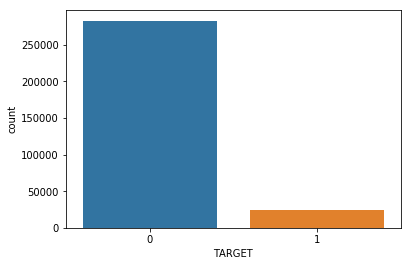

,Count,Percent
TARGET,,
0,282686,0.919271
1,24825,0.080729


In [5]:
# %%pixie_debugger
target=['TARGET']
yTarget=train_df[target]
ax=sns.countplot(x="TARGET",data=yTarget)
plt.show()

tab=pd.DataFrame(train_df.groupby(target).size(),columns=['Count'])
tab['Percent']=tab.Count/tab.Count.sum()
ratio=tab['Percent'][0]/tab['Percent'][1]
tab

In [6]:
train_cdf=train_df.drop(columns=target).copy(deep=True)
combine = train_cdf.append(test_df)
combine.shape
wr=combine.describe()
wr.T.to_csv('wrcombine.csv',index=True)

In [7]:
# Project specific
combine['DAYS_BIRTH']=combine['DAYS_BIRTH']/-365
combine['DAYS_EMPLOYED']=combine['DAYS_EMPLOYED']/-365
combine['DAYS_REGISTRATION']=combine['DAYS_REGISTRATION']/-365
combine['DAYS_ID_PUBLISH']=combine['DAYS_ID_PUBLISH']/-365
combine['DAYS_LAST_PHONE_CHANGE']=combine['DAYS_LAST_PHONE_CHANGE']/-365


In [8]:
# log transform
listtrans=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
combine[listtrans]=np.log(combine[listtrans])

6.532023 years is used in employment replacement


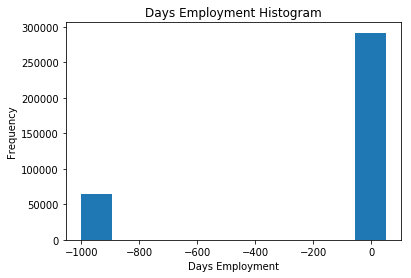

In [9]:
# Project specific
combine['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
combine['DAYS_EMPLOYED'].to_csv('checkcol.csv',index=True)
replaceDE=train_df[train_df['DAYS_EMPLOYED']<0].DAYS_EMPLOYED.mean()/-365
print('%f years is used in employment replacement' % replaceDE)

In [10]:
# Project specific
#Replace employment greater than zero with mean
combine.loc[combine['DAYS_EMPLOYED'] <0, 'DAYS_EMPLOYED'] = replaceDE
combine['DAYS_EMPLOYED'].to_csv('wrcombine.csv',index=True)

In [11]:
misstable,droplistfull=showmiss(combine)
droplistfull

,Total,Miss,Percent,Datatype
COMMONAREA_MODE,356255,248360,0.697141,float64
COMMONAREA_MEDI,356255,248360,0.697141,float64
COMMONAREA_AVG,356255,248360,0.697141,float64
NONLIVINGAPARTMENTS_MODE,356255,246861,0.692933,float64
NONLIVINGAPARTMENTS_MEDI,356255,246861,0.692933,float64
NONLIVINGAPARTMENTS_AVG,356255,246861,0.692933,float64
FONDKAPREMONT_MODE,356255,243092,0.682354,object
LIVINGAPARTMENTS_MODE,356255,242979,0.682037,float64
LIVINGAPARTMENTS_MEDI,356255,242979,0.682037,float64
LIVINGAPARTMENTS_AVG,356255,242979,0.682037,float64


In [12]:
# Decide to drop
droppercent=0.2
droplist=misstable[(misstable.Percent>droppercent)]
l=droplist.index.tolist()
list(l)
cm=combine.drop(columns=list(l), axis=1)
# cm=combine.drop(columns=['ID'])
# cm=cm.replace(r'', np.nan, regex=True)
# cm.to_csv('checkall.csv',index=True)

In [13]:
print(cm.shape)
print(cm.dtypes)

(356255, 71)
ID                               int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL  

In [14]:
# Replace missing values with average and most frequent
train_dfmt=cm[0:train_df.shape[0]]
test_dfmt=cm[train_df.shape[0]:]
# train_dfmt.to_csv('checktrain_b.csv',index=True)
# test_dfmt.to_csv('checktest_b.csv',index=True)
train_dfm,test_dfm=repmiss(train_dfmt,test_dfmt)
# train_dfm.to_csv('checktrain_af.csv',index=True)
# test_dfm.to_csv('checktest_af.csv',index=True)

cm=train_dfm.append(test_dfm)

In [15]:
# cm.to_csv('checkcm.csv',index=True)

In [16]:
# Display all columns unique value
# for col in cm:
#     print(cm[col].name,'*Num Unique*',cm[col].nunique(),cm[col].unique(),"\n")

In [17]:
# Categorical Variable to dummy variable if more than 2 category (onehotencoder)
# cmohe=pd.get_dummies(data=cm,drop_first=True)
cmohe=trans_cate(cm)
# cmohe.to_csv('checkcmohe.csv',index=True)

3 columns were label encoded. ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
(356255, 163)


In [18]:
wr=cmohe.describe()
# wr.T.to_csv('wrcmohe.csv',index=True)

In [19]:
# Convert categorical to dummy variable
# cm1 = pd.get_dummies(cm)
# cm['LotShape'] = cm.LotShape.cat.codes

# le = LabelEncoder()
# for i in cm.columns[cm.dtypes == 'object']: # df.dtypes == 'category'
#     cm[i]=le.fit_transform(list(cm[i].values))
# cm.head(5)

In [20]:
ac=cmohe[0:train_df.shape[0]].copy(deep=True)
temptraincorr=pd.concat([ac,train_df['TARGET']],axis=1)
temptraincorr.head(3)
# temptraincorr.to_csv('corrcheck.csv',index=True)
temptraincorr.shape

(307511, 164)

TARGET,0,1,Diff
NAME_INCOME_TYPE_Maternity leave,0.000011,0.000081,7.591433
NAME_INCOME_TYPE_Unemployed,0.000050,0.000322,6.506943
FLAG_DOCUMENT_2,0.000032,0.000161,5.060956
ORGANIZATION_TYPE_Transport: type 3,0.003537,0.007533,2.129397
FLAG_DOCUMENT_21,0.000315,0.000564,1.791237
ORGANIZATION_TYPE_Industry: type 13,0.000205,0.000363,1.766972
ORGANIZATION_TYPE_Industry: type 8,0.000074,0.000121,1.626736
NAME_HOUSING_TYPE_Rented apartment,0.015140,0.024209,1.598990
REG_CITY_NOT_LIVE_CITY,0.074641,0.118389,1.586106
ORGANIZATION_TYPE_Restaurant,0.005656,0.008540,1.509741


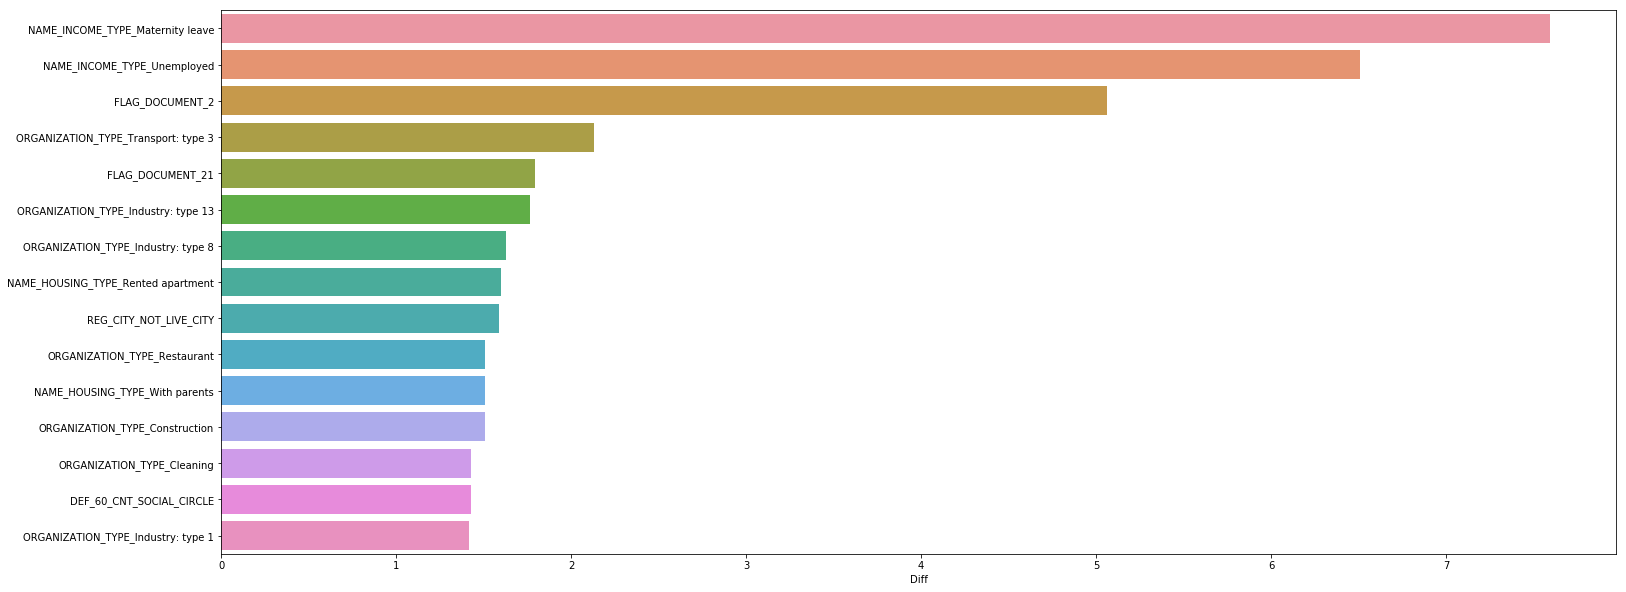

In [21]:
showcatediff(xt=temptraincorr,tar='TARGET',topx=15)

In [22]:
corrmat = temptraincorr.corr()

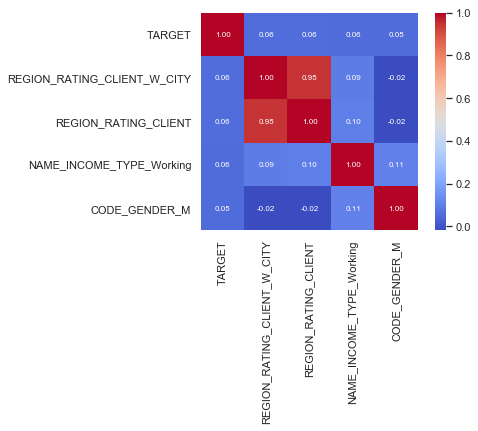

In [23]:
#Target correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'TARGET')['TARGET'].index
cmd = np.corrcoef(temptraincorr[cols].values.T)
fig = plt.figure()
sns.set(font_scale=1)
hm = sns.heatmap(cmd,cmap="coolwarm",cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
fig.savefig('corr.png')

# Feature Scaling

In [25]:
# log if numerical data is great than pick
pick=3
ltt=pd.DataFrame({'Avg':cmohe.mean(),'Min':cmohe.min(),'Max':cmohe.max()}).sort_values(by=['Avg'],ascending=False)
lt=ltt[:pick].index.tolist()
print(lt)
# cmlog = np.log(cm[lt]).copy(deep=True)
# ltt

['ID', 'DAYS_BIRTH', 'DAYS_REGISTRATION']


In [26]:
# cmohe=cmohe.drop(columns='ID').copy(deep=True)

In [27]:
# feature scaling, for numerical data, use (x-min)/(max-min)
train_sct=cmohe[0:train_df.shape[0]].copy(deep=True)
test_sct=cmohe[train_df.shape[0]:].copy(deep=True)

train_sc=cmohe[0:train_df.shape[0]].copy(deep=True)
test_sc=cmohe[train_df.shape[0]:].copy(deep=True)

scaler = MinMaxScaler(feature_range = (0, 1))
transformer = scaler.fit(train_sct)
train_sc=transformer.transform(train_sct)
train_sc = pd.DataFrame(train_sc, columns=train_sct.columns).drop(columns='ID')
test_sc=transformer.transform(test_sct)
test_sc = pd.DataFrame(test_sc, columns=test_sct.columns).drop(columns='ID')

# cms=train_sc.append(test_sc)
# cms.describe().to_csv('scalecheck.csv',index=True)
# cms.to_csv('datacheck.csv',index=True)

In [28]:
# Split Training Data into Sub_Train and Sub_Validation
xTrain, xTest, yTrain, yTest = train_test_split(train_sc, yTarget, test_size = 0.001, random_state = 46,stratify=yTarget)

In [29]:
# xTrain.to_csv('xTrain.csv',index=True)
# yTrain.to_csv('yTrain.csv',index=True)
# xTest.to_csv('xTest.csv',index=True)
# yTest.to_csv('yTest.csv',index=True)

# Modeling

# LightGBM

In [30]:
lgbmodel = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=1000, objective = 'binary',
                              class_weight = 'balanced', learning_rate = 0.05,
                              reg_alpha = 0.1, reg_lambda = 0.1, subsample = 1, n_jobs = -1,
                              random_state = 50,importance_type='gain',silent=False)

In [31]:
lgbm2=lgbmodel.fit(xTrain, yTrain, eval_metric = ['f1', 'auc'],
                  eval_set = [(xTest, yTest), (xTrain, yTrain)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 300, verbose = 100)

Training until validation scores don't improve for 300 rounds.
[100]	train's binary_logloss: 0.579986	train's auc: 0.765985	valid's binary_logloss: 0.58818	valid's auc: 0.795194
[200]	train's binary_logloss: 0.563388	train's auc: 0.782248	valid's binary_logloss: 0.574906	valid's auc: 0.804523
[300]	train's binary_logloss: 0.551731	train's auc: 0.794637	valid's binary_logloss: 0.566686	valid's auc: 0.812721
[400]	train's binary_logloss: 0.540561	train's auc: 0.806276	valid's binary_logloss: 0.559073	valid's auc: 0.815406
[500]	train's binary_logloss: 0.530284	train's auc: 0.81693	valid's binary_logloss: 0.553696	valid's auc: 0.81894
[600]	train's binary_logloss: 0.520739	train's auc: 0.826616	valid's binary_logloss: 0.549559	valid's auc: 0.814134
[700]	train's binary_logloss: 0.511808	train's auc: 0.83558	valid's binary_logloss: 0.546202	valid's auc: 0.813993
Early stopping, best iteration is:
[453]	train's binary_logloss: 0.534977	train's auc: 0.812117	valid's binary_logloss: 0.555091	

In [32]:
lgb2_pred = lgbm2.predict(xTest)
lgb2_prob = lgbm2.predict_proba(xTest)[:,1]

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       283
           1       0.19      0.76      0.30        25

   micro avg       0.72      0.72      0.72       308
   macro avg       0.58      0.74      0.56       308
weighted avg       0.91      0.72      0.78       308

Max F1 0.4313725490196078


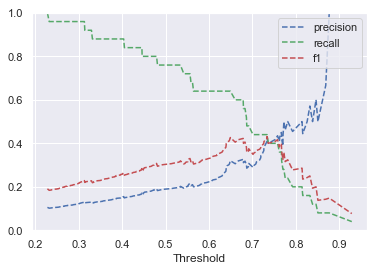

In [33]:
print(classification_report(yTest, lgb2_pred))
precision, recall, thresholds = precision_recall_curve(y_true=yTest['TARGET'], probas_pred=lgb2_prob, pos_label=1)
print('Max F1',max((2*precision*recall)/(precision+recall)))
plot_prec_recall_vs_tresh(precision, recall, thresholds)
plt.show()

# XGB

In [34]:
# xgb1 is the baseline model without any para
xgbp1 = xgb.XGBClassifier()
xgbm1 = xgbp1.fit(xTrain, yTrain)
xgb1_pred = xgbm1.predict(xTest)
xgb1_prob = xgbm1.predict_proba(xTest)[:,1]

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       283
           1       1.00      0.04      0.08        25

   micro avg       0.92      0.92      0.92       308
   macro avg       0.96      0.52      0.52       308
weighted avg       0.93      0.92      0.89       308

Max F1 0.4057971014492754


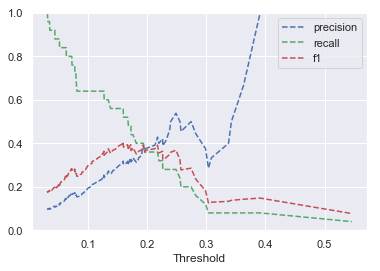

In [35]:
print(classification_report(yTest, xgb1_pred))
precision, recall, thresholds = precision_recall_curve(y_true=yTest, probas_pred=xgb1_prob, pos_label=1)
print('Max F1',max((2*precision*recall)/(precision+recall)))
plot_prec_recall_vs_tresh(precision, recall, thresholds)
plt.show()

In [36]:
# xgb2 is the refine parameter check https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
# params = list(booster='gbtree',verbosity=1,eta = 0.1, gamma=1,max_depth=6,min_child_weight=10,max_delta_step=1,subsample=0.9,reg_lambda=1,tree_method='hist',scale_pos_weight=ratio,objective = 'binary:logistic',eval_metric='auc',seed=46)
xgbp2 = xgb.XGBClassifier(n_estimators=200,booster='gbtree',verbose=True,verbosity=1,
                         eta = 0.1, gamma=1,max_depth=6,min_child_weight=10,max_delta_step=1,subsample=0.9,
                         reg_lambda=1,tree_method='hist',scale_pos_weight=ratio,objective = 'binary:logistic',
                         eval_metric='auc',seed=46)
eval_set = [(xTest, yTest)]
xgbm2 = xgbp2.fit(xTrain, yTrain,verbose=False,eval_metric=['auc'],
                  eval_set = [(xTest, yTest)],early_stopping_rounds = 50)
xgb2_pred = xgbm2.predict(xTest)
xgb2_prob = xgbm2.predict_proba(xTest)[:,1]

[11:31:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


In [37]:
# save the XGB model to disk
filename = 'XGB2.model'
model=xgbm2
joblib.dump(model, filename, compress=5)

['XGB2.model']

In [38]:
# load the XGB model from disk, need to load 1st column as index
# xTest = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\Credit\xTest.csv",index_col=0)
filename = 'XGB2.model'
load_xgb2 = joblib.load(filename)
load_xgb2_prob=load_xgb2.predict_proba(xTest)[:,1]
print(xgb2_prob)
print(load_xgb2_prob)

[0.59511524 0.44503212 0.13232543 0.23941725 0.6871222  0.34227344
 0.8055076  0.44869962 0.30844644 0.39349115 0.24128881 0.23402585
 0.5015634  0.70429564 0.7168078  0.37815827 0.463141   0.10634537
 0.20795025 0.66414195 0.24222834 0.431552   0.34974742 0.30093196
 0.36551294 0.18972012 0.5129518  0.06454641 0.5642019  0.7094719
 0.5831553  0.5943515  0.09251976 0.6541983  0.60739654 0.15516423
 0.11041173 0.37321967 0.20157945 0.62949646 0.3207861  0.2620167
 0.76538986 0.44120073 0.38026777 0.6939792  0.39033955 0.5901773
 0.32248998 0.3096628  0.33879113 0.2955476  0.77527004 0.34234783
 0.16778128 0.53898877 0.39262238 0.50777423 0.43166518 0.21566142
 0.34317884 0.43192065 0.6610827  0.44890082 0.39124176 0.4466511
 0.4889101  0.74169016 0.5475894  0.3983889  0.24986966 0.7264716
 0.2719489  0.30215964 0.23865205 0.33819363 0.16779104 0.5034938
 0.7115501  0.40612108 0.28393713 0.4117896  0.06318385 0.39742208
 0.42230222 0.16831739 0.3311981  0.72870064 0.6584977  0.8680756
 0

[11:32:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:32:12] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:32:39] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:33:21] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:33:30] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:33:53] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:34:34] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:34:41] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:35:06] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:35:50] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[11:35:58] Tree meth

<module 'matplotlib.pyplot' from 'C:\\Users\\kuangj\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

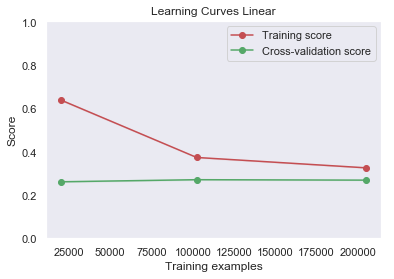

In [39]:
# Learning Curves
c=[0.1,0.5,1.0]
cv=3
model=xgbm2
score='f1'
train_sizes, train_scores, valid_scores = learning_curve(model, xTrain, yTrain, train_sizes=c, cv=cv)
title = "Learning Curves Linear"
plot_learning_curve(model, title,X=xTrain, y=yTrain,train_sizes=c,cv=cv,scoring=score,ylim=(0.0, 1.01))

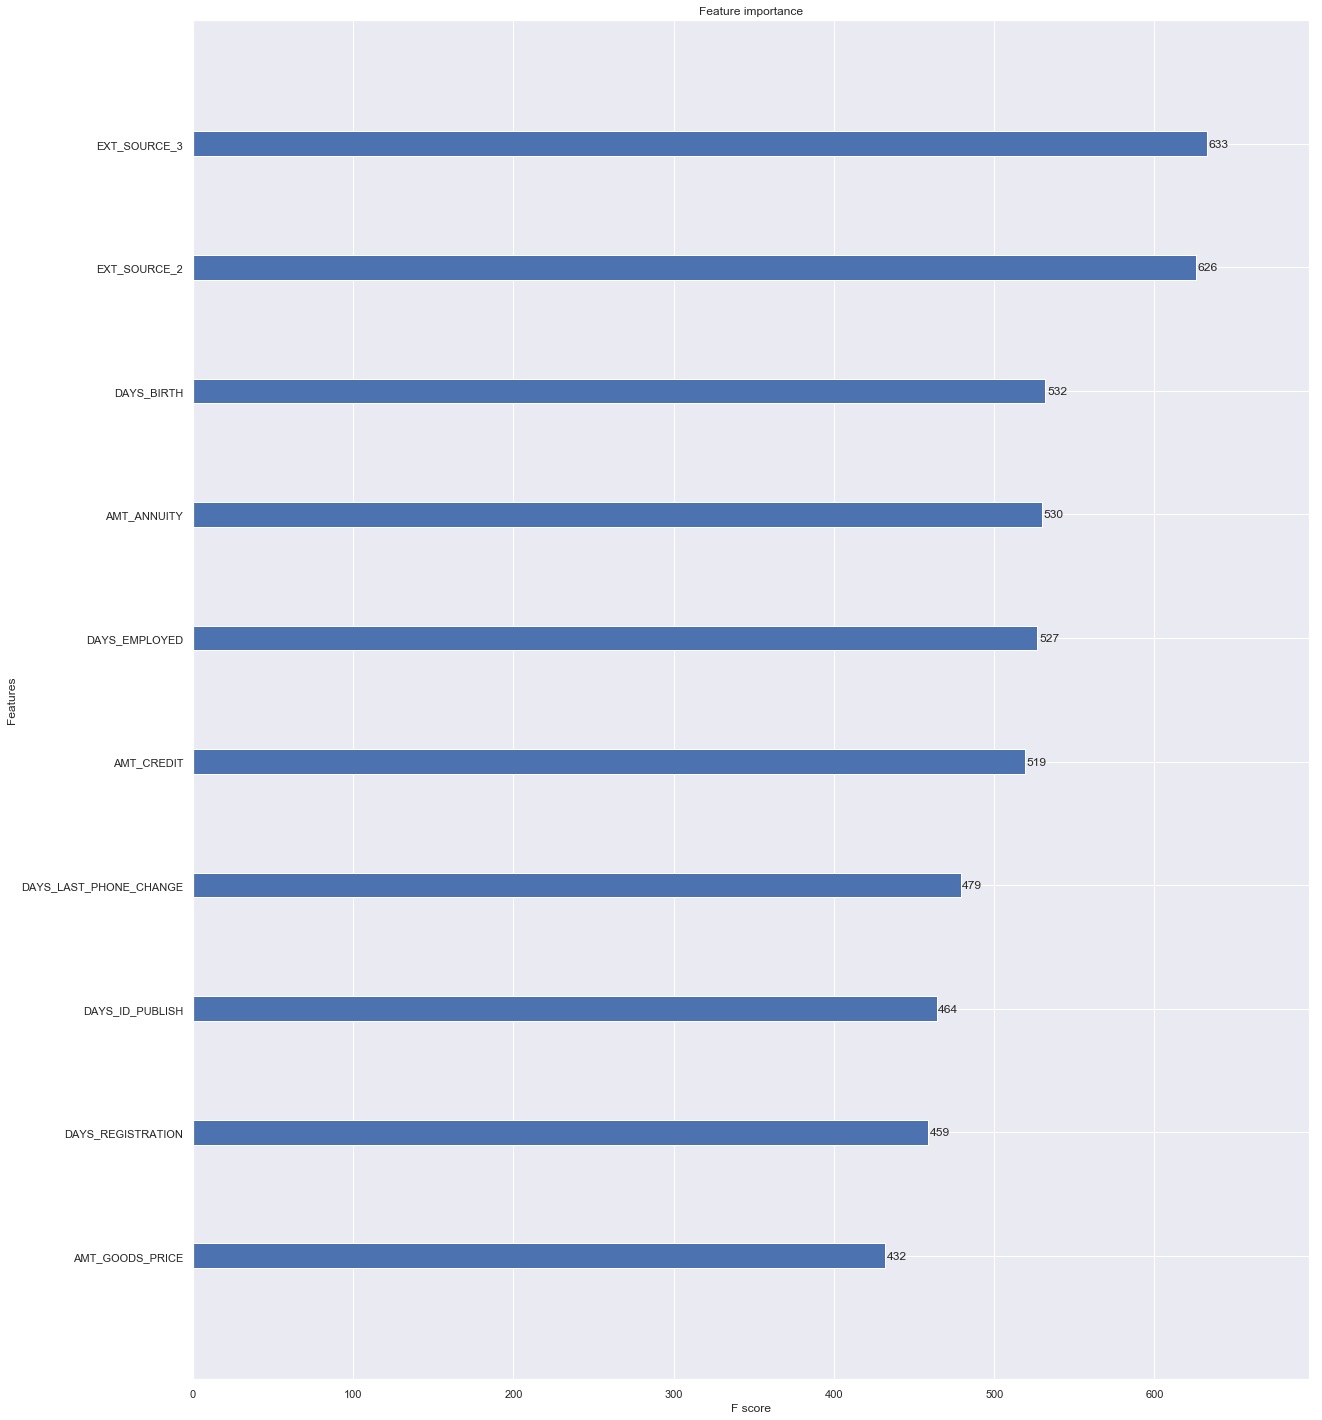

In [40]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(xTrain.columns, xgbm2.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'XGB-importance'})
# importances.sort_values(by=['Gini-importance'],ascending=True).plot(kind='bar', rot=45)
importances=importances.sort_values(by=['XGB-importance'],ascending=False)
importances['XGB-importance']=importances['XGB-importance']*100/importances['XGB-importance'].iloc[0]
importances.to_csv('xgb_checkimpt.csv',index=True)

fig, ax = plt.subplots(1, 1, figsize=(20, 25))
plot_importance(xgbm2, max_num_features=10,height=0.2, ax=ax)
pyplot.show()

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       283
           1       0.18      0.76      0.29        25

   micro avg       0.70      0.70      0.70       308
   macro avg       0.58      0.73      0.55       308
weighted avg       0.91      0.70      0.77       308

Max F1 0.4255319148936171


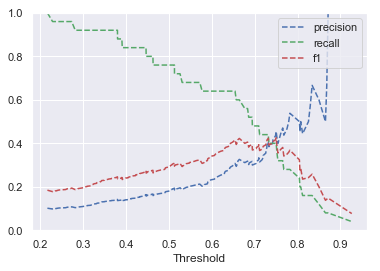

In [41]:
print(classification_report(yTest, xgb2_pred))
precision, recall, thresholds = precision_recall_curve(y_true=yTest['TARGET'], probas_pred=xgb2_prob, pos_label=1)
print('Max F1',max((2*precision*recall)/(precision+recall)))
plot_prec_recall_vs_tresh(precision, recall, thresholds)
plt.show()

# Logistic Regression

In [42]:
LogReg = LogisticRegression(class_weight='balanced',C=0.3)
LogRegCV = LogisticRegression(class_weight='balanced')
logmodel=LogReg.fit(xTrain, yTrain)
log_pred = logmodel.predict(xTest)
log_prob = logmodel.predict_proba(xTest)[:, 1]

In [43]:
matrix_log=confusion_matrix(yTest,log_pred,labels=[1,0])
tp, fn, fp, tn = confusion_matrix(yTest,log_pred,labels=[1,0]).ravel()
print(matrix_log.T)
f1 = f1_score(yTest,log_pred,labels=[1,0])
print('F1:',f1)
# calculate AUC
auc = roc_auc_score(yTest,log_pred)
print('AUC: %.3f' % auc)
print(classification_report(yTest, log_pred))

[[ 17  91]
 [  8 192]]
F1: 0.2556390977443609
AUC: 0.679
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       283
           1       0.16      0.68      0.26        25

   micro avg       0.68      0.68      0.68       308
   macro avg       0.56      0.68      0.53       308
weighted avg       0.89      0.68      0.75       308



In [44]:
# Gridsearch for the best regularization C
f1_scorer = make_scorer(f1_score, pos_label=1)
nr_cv=2
# score_calc = ['f1']
parameters = {'C':[0.3,1]}
grid_log = GridSearchCV(LogRegCV, parameters, cv=nr_cv, scoring = f1_scorer,verbose=1)
grid_log.fit(xTrain, yTrain)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.3s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.3, 1]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=1), verbose=1)

In [45]:
print('Best Score is:',grid_log.best_score_)
print('Best Params is:',grid_log.best_params_)

Best Score is: 0.257256848684854
Best Params is: {'C': 1}


Max F1 0.4528301886792452


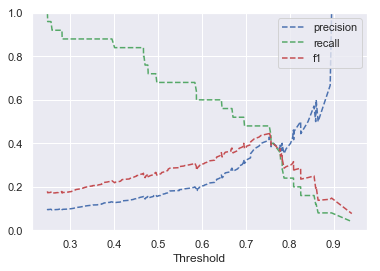

In [46]:
precision, recall, thresholds = precision_recall_curve(y_true=yTest['TARGET'], probas_pred=log_prob, pos_label=1)
print('Max F1',max((2*precision*recall)/(precision+recall)))
plot_prec_recall_vs_tresh(precision, recall, thresholds)
plt.show()

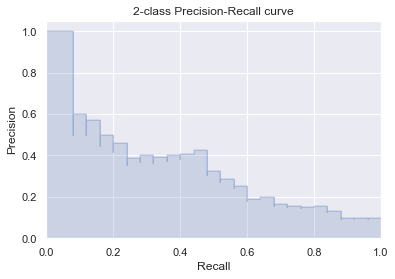

In [47]:
plot_prec_recall(precision, recall, thresholds)
plt.show()

In [48]:
# fpr, tpr, thresholds = roc_curve(yTest['TARGET'],logprobs,pos_label=1)
# # plot no skill
# pyplot.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# pyplot.plot(fpr, tpr, marker='.')
# # show the plot
# pyplot.show()

In [49]:
# #adjust
# yPred_Log_Adj = np.where(logprob[:,1] > 0.65, 1, 0)
# matrix_log=confusion_matrix(yTest,yPred_Log_Adj,labels=[1,0]).T
# matrix_log

In [50]:
# logmodel.score(xTest, yTest)

# Random Forest

In [51]:
rf = RandomForestClassifier(n_estimators = 200, verbose = 1, n_jobs = -1,class_weight='balanced')
rf.fit(xTrain, yTrain)
rf_pred = rf.predict(xTest)
rf_prob = rf.predict_proba(xTest)[:, 1]
print(classification_report(yTest, rf_pred))

C:\Users\kuangj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       283
           1       0.00      0.00      0.00        25

   micro avg       0.92      0.92      0.92       308
   macro avg       0.46      0.50      0.48       308
weighted avg       0.84      0.92      0.88       308



[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Max F1: 0.3859649122807018


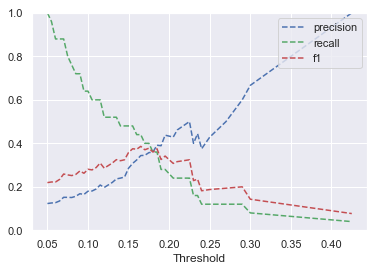

In [52]:
precision, recall, thresholds = precision_recall_curve(y_true=yTest['TARGET'],probas_pred=rf_prob,pos_label=1)
print('Max F1:',max((2*precision*recall)/(precision+recall)))
plot_prec_recall_vs_tresh(precision, recall, thresholds)
plt.show()

In [53]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(xTrain.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
# importances.sort_values(by=['Gini-importance'],ascending=True).plot(kind='bar', rot=45)
importances=importances.sort_values(by=['Gini-importance'],ascending=False)
importances['Gini-importance']=importances['Gini-importance']*100/importances['Gini-importance'].iloc[0]
importances.to_csv('rf_checkimpt.csv',index=True)

# Neural Network

In [54]:
# NN need scale to 0~1
NNclf = MLPClassifier(solver='sgd',hidden_layer_sizes=(6,),alpha=0.0001,activation='logistic',batch_size='auto',random_state=1)
NNclf.fit(xTrain,yTrain)
NNclf_pred=NNclf.predict(xTest)
NNclf_prob=NNclf.predict_proba(xTest)[:,1]
print(classification_report(yTest, NNclf_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       283
           1       0.00      0.00      0.00        25

   micro avg       0.92      0.92      0.92       308
   macro avg       0.46      0.50      0.48       308
weighted avg       0.84      0.92      0.88       308



Max F1: 0.4528301886792452


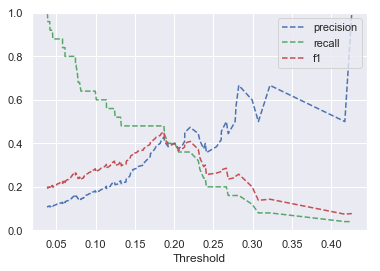

In [55]:
precision, recall, thresholds = precision_recall_curve(y_true=yTest['TARGET'], probas_pred=NNclf_prob,pos_label=1)
print('Max F1:',max((2*precision*recall)/(precision+recall)))
plot_prec_recall_vs_tresh(precision, recall, thresholds)
plt.show()

# Final Production

In [66]:
log_prob = logmodel.predict_proba(test_sc)[:, 1]
rf_prob = rf.predict_proba(test_sc)[:, 1]
NNclf_prob = NNclf.predict_proba(test_sc)[:,1]
xgb_prob = xgbm2.predict_proba(test_sc)[:,1]
lgb_prob = lgbm2.predict_proba(test_sc)[:,1]

probtable=pd.DataFrame({'ID':test_sct['ID'],'Log':log_prob,'RF':rf_prob,'NN':NNclf_prob,'XGB':xgb_prob
                       ,'LGB':lgb_prob})
prob=(lgb_prob+xgb_prob+NNclf_prob+rf_prob+log_prob)/5
probtable.head()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


,ID,Log,RF,NN,XGB,LGB
0,100001,0.416923,0.080,0.055148,0.256051,0.320574
1,100005,0.738280,0.150,0.201018,0.705357,0.723799
2,100013,0.294808,0.035,0.024979,0.133481,0.161851
3,100028,0.357755,0.050,0.060240,0.428778,0.378847
4,100038,0.562598,0.230,0.119736,0.661424,0.637157


In [65]:
temp=pd.DataFrame(prob,columns=['TARGET'])
submit=pd.concat([test_sct['ID'],temp['TARGET']], axis=1)
submit=submit.rename(columns = {'ID':'SK_ID_CURR'})
submit.to_csv('submit_temp.csv',index=False)

In [60]:
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
# GridSearchCV(cv=None,
#              estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
#                dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
#              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [61]:
# plt.figure()
# plot_confusion_matrix(matrix_log, classes=class_names,
#                       title='Confusion matrix, without normalization')